In [1]:
#import sys
#!{sys.executable} -m pip install --upgrade c-lasso 
from classo import *
import zarr
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Data 

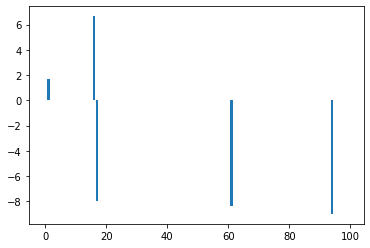

array([ 1, 16, 17, 61, 94])

In [2]:
m,d,d_nonzero,k,sigma =150,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=False,seed=None)
plt.bar(range(len(sol)),sol)
plt.show()

np.arange(len(sol))[sol !=0.]

In [3]:
print("lambdamax = ", max(abs(X.T.dot(y))))

lambdamax =  1215.748800836949


## Problems

In [4]:
problem = classo_problem(X,y,C=C)
problem.model_selection.PATH = True
problem.model_selection.CV = True
problem.model_selection.StabSel = True
problem.model_selection.LAMfixed = True

problem.formulation.w = np.array([2.]*40+ [1.]*(d-40))


problem1 = deepcopy(problem)
problem2 = deepcopy(problem)
problem3 = deepcopy(problem)

problem1.formulation.w = np.array([2.]*40+ [1.]*(d-40))
problem3.formulation.w = np.array([2.]*40+ [1.]*(d-40))


problem1.formulation.intercept = True
problem2.formulation.intercept = True

### Path 

In [5]:
param = problem1.model_selection.PATHparameters
param.numerical_method = ' '
param.n_active = 20
param.lambdas = np.linspace(1.,1e-3,50)

In [6]:
param = problem2.model_selection.PATHparameters
param.numerical_method = 'P-PDS'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,50)

In [7]:
param = problem3.model_selection.PATHparameters
param.numerical_method = 'DR'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,20)

### Cross validation 

In [8]:
param = problem1.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 5
param.oneSE = True
param.lambdas = np.linspace(1.,1e-3,80)

In [9]:
param = problem2.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 7
param.oneSE = False
param.lambdas = np.linspace(1.,1e-3,80)

In [10]:
param = problem3.model_selection.CVparameters
param.seed = 2
param.numerical_method = 'P-PDS'
param.Nsubset = 3
param.oneSE = True
param.lambdas = np.linspace(1.,1e-1,20)

### Stability Selection

In [11]:
param = problem1.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'first'
param.B = 50
param.q = 10
param.percent_nS = 0.5
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.7 
param.threshold_label = 0.2

In [12]:
param = problem2.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'max'
param.B = 70
param.q = 20
param.percent_nS = 0.8
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.5 
param.threshold_label = 0.2

In [13]:
param = problem3.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'lam'
param.B = 50
param.q = 1000
param.percent_nS = 0.4
param.lamin = 1.
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.8
param.threshold_label = 0.2

### Lambda fixed 

In [14]:
param = problem1.model_selection.LAMfixedparameters
param.numerical_method = 'P-PDS'
param.lam = 'theoretical'
param.true_lam = True

In [15]:
param = problem2.model_selection.LAMfixedparameters
param.numerical_method = 'DR'
param.lam = 0.1
param.true_lam = False

In [16]:
param = problem3.model_selection.LAMfixedparameters
param.numerical_method = ' '
param.lam = 0.
param.true_lam = True

## R1

In [17]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = P-PDS
     rescaled lam : True
     threshold = 0.253
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



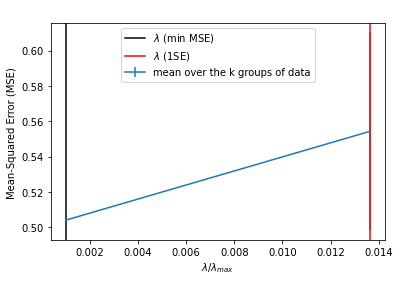

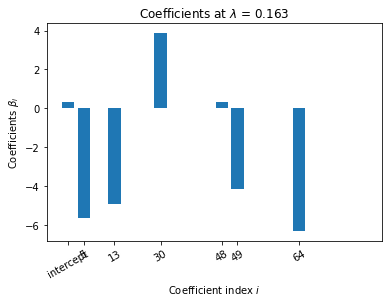

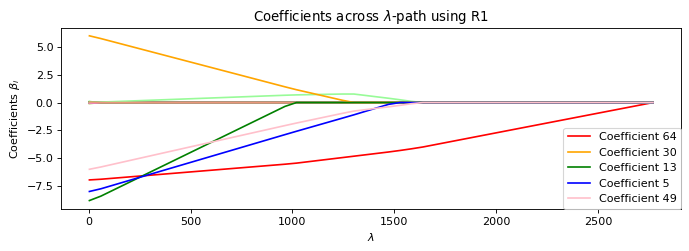

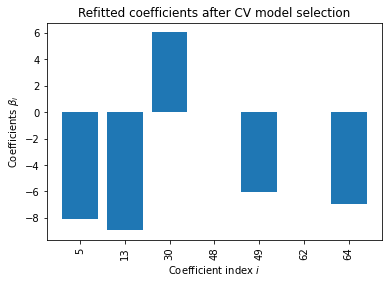

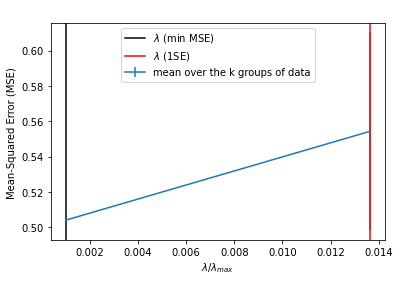

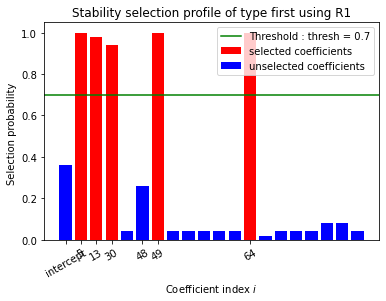

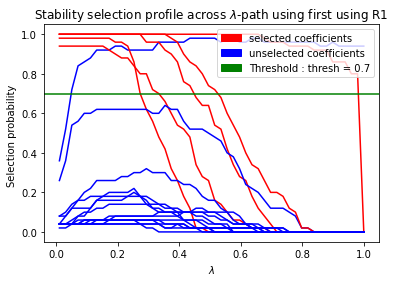

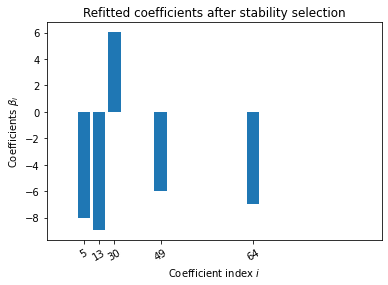


 LAMBDA FIXED : 
   Selected variables :  intercept    5    13    30    48    49    64    
   Running time :  0.012s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.037s

 CROSS VALIDATION : 
 Intercept : 0.044832927488046126
   Selected variables :  5    13    30    48    49    62    64    
   Running time :  0.375s

 STABILITY SELECTION : 
   Selected variables :  0    1    2    5    11    
   Running time :  0.604s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.295
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerica

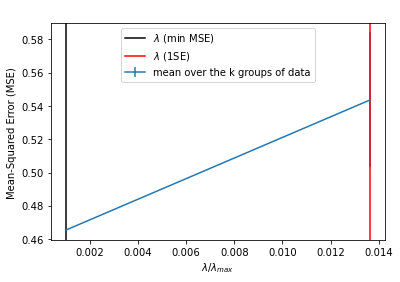

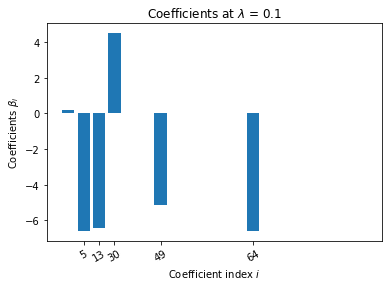

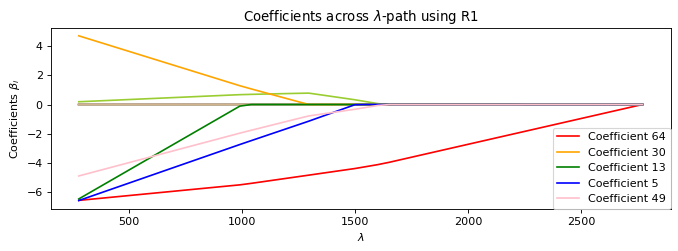

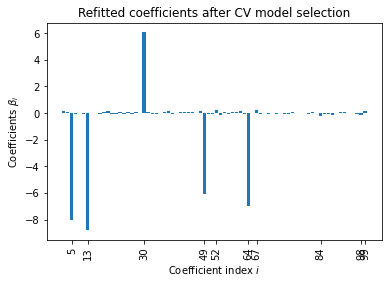

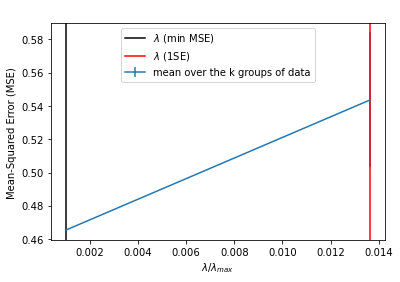

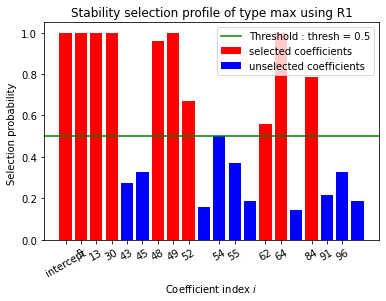

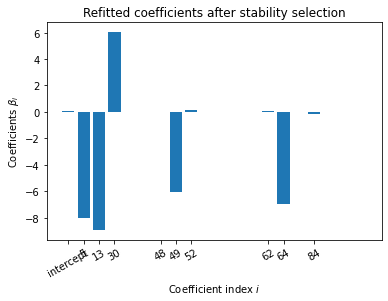


 LAMBDA FIXED : 
   Selected variables :  5    13    30    49    64    
   Running time :  0.084s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.201s

 CROSS VALIDATION : 
 Intercept : 0.06000925180823469
   Selected variables :  0    4    5    6    7    12    13    14    15    16    17    19    20    22    23    24    25    26    27    28    30    32    33    35    36    37    38    40    42    43    44    45    46    47    48    49    50    51    52    54    56    57    58    59    62    63    64    66    67    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    91    93    95    96    97    98    99    
   Running time :  0.472s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    1    2    5    6    7    12    13    15    
   Running time :  0.845s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection


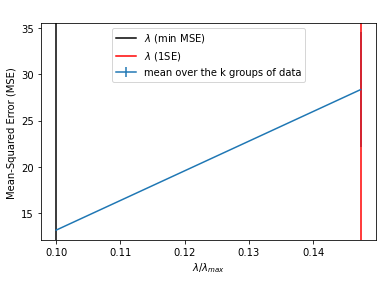

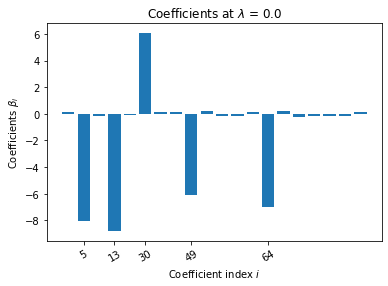

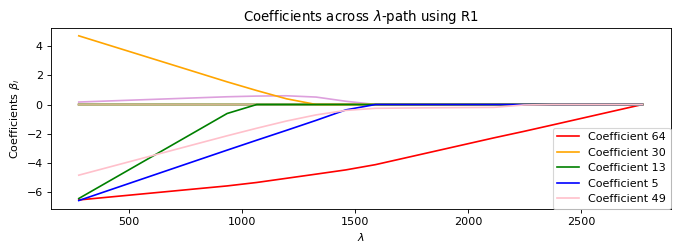

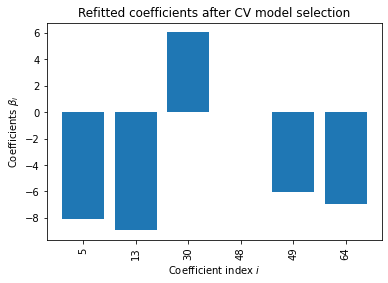

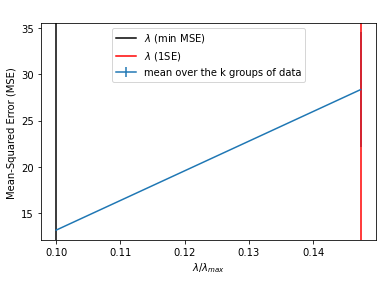

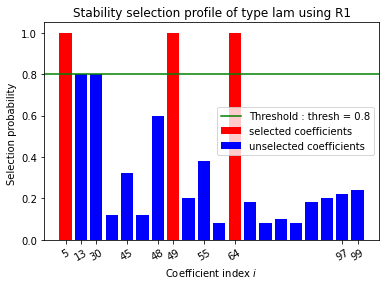

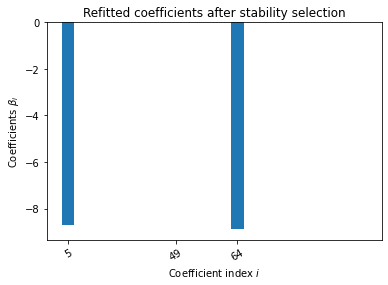


 LAMBDA FIXED : 
   Selected variables :  5    13    30    49    64    
   Running time :  0.001s

 PATH COMPUTATION : 
   Running time :  0.512s

 CROSS VALIDATION : 
   Selected variables :  5    13    30    48    49    64    
   Running time :  0.267s

 STABILITY SELECTION : 
   Selected variables :  0    7    11    
   Running time :  0.265s



In [18]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)

problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [19]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

problem1.formulation.intercept = False
problem2.formulation.intercept = False
problem3.formulation.intercept = False

## R2

In [20]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = False

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = P-PDS
     rescaled lam : True
     threshold = 0.253
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



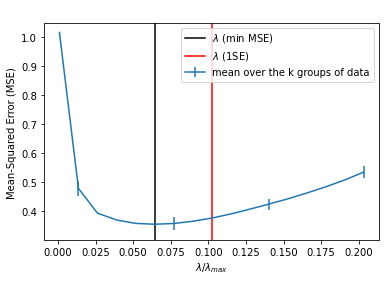

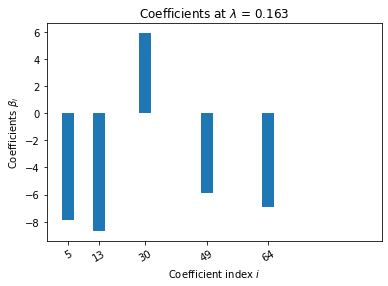

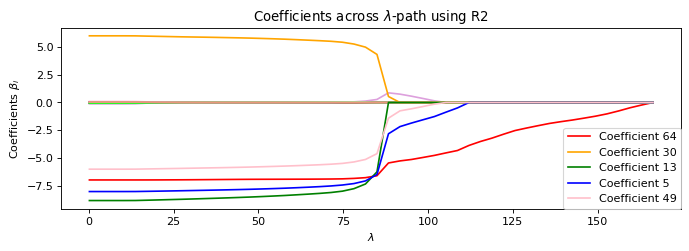

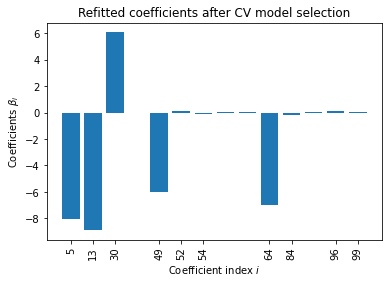

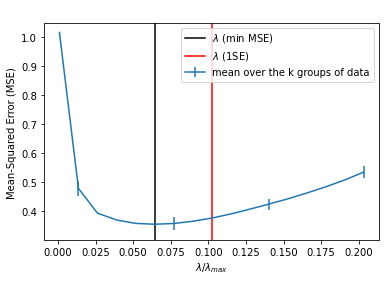

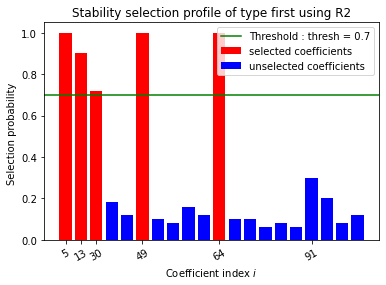

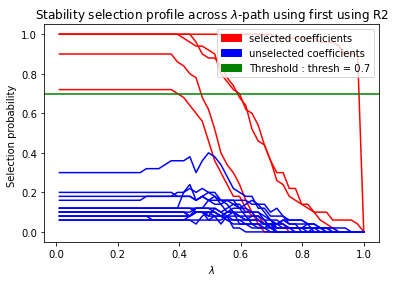

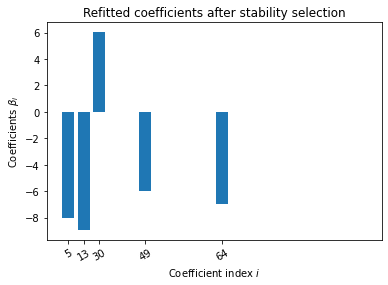


 LAMBDA FIXED : 
   Selected variables :  5    13    30    49    64    
   Running time :  0.112s

 PATH COMPUTATION : 
   Running time :  0.424s

 CROSS VALIDATION : 
   Selected variables :  5    13    30    48    49    52    54    59    62    64    84    88    96    99    
   Running time :  3.121s

 STABILITY SELECTION : 
   Selected variables :  0    1    2    5    10    
   Running time :  6.872s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.295
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAME

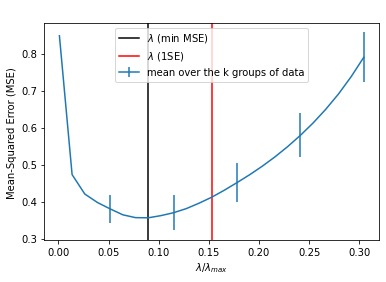

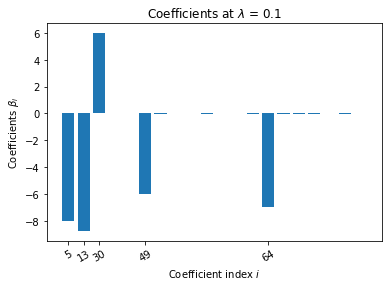

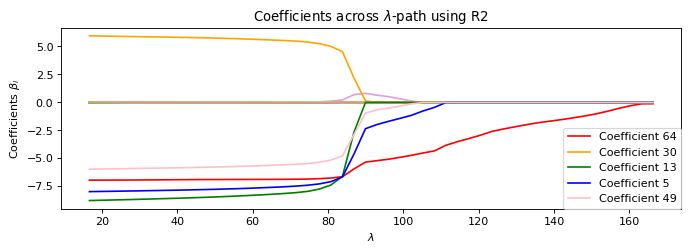

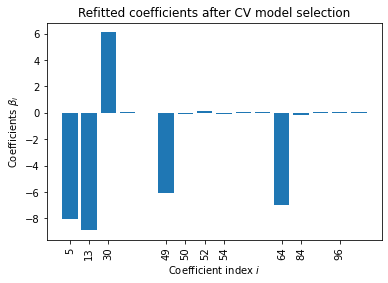

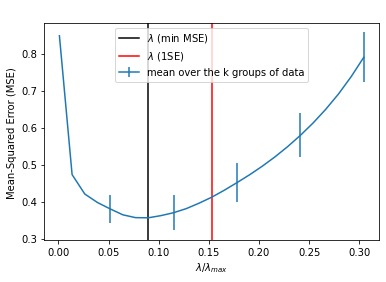

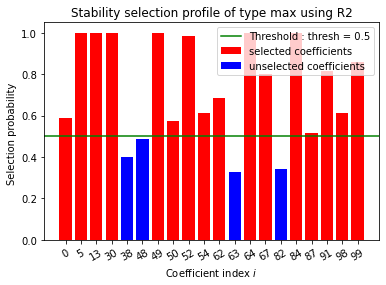

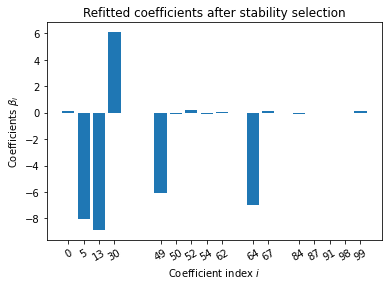


 LAMBDA FIXED : 
   Selected variables :  5    13    30    49    64    
   Running time :  0.168s

 PATH COMPUTATION : 
   Running time :  9.487s

 CROSS VALIDATION : 
   Selected variables :  5    13    30    43    48    49    50    52    54    59    62    64    84    88    96    99    
   Running time :  5.063s

 STABILITY SELECTION : 
   Selected variables :  0    1    2    3    6    7    8    9    10    12    13    15    16    17    18    19    
   Running time :  28.086s

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.428
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : P-PDS
     one-SE method : True
     Nsubset = 3
     lamin = 0.1
     Nlam = 20
 
 
STABILITY SELECT

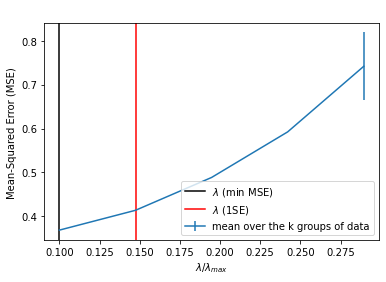

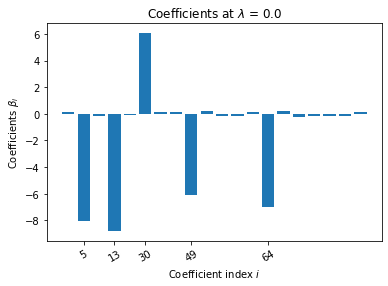

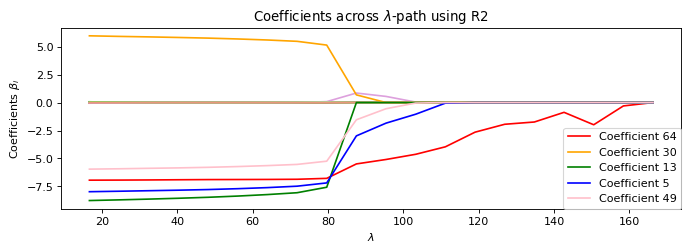

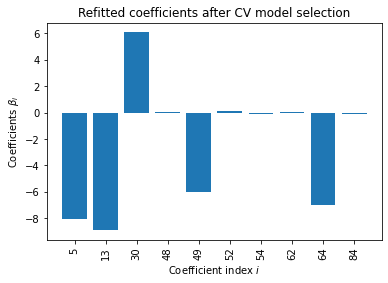

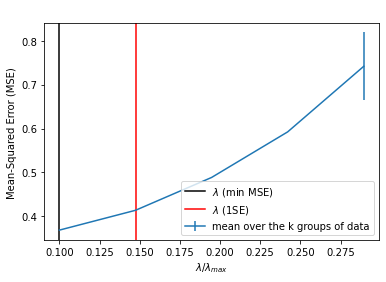

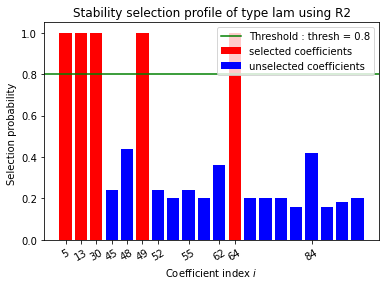

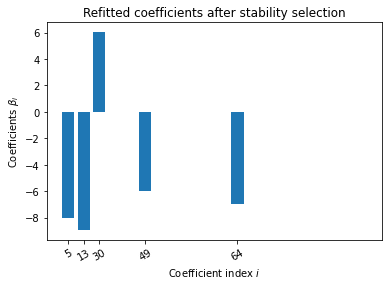


 LAMBDA FIXED : 
   Selected variables :  5    13    30    49    64    
   Running time :  0.013s

 PATH COMPUTATION : 
   Running time :  7.353s

 CROSS VALIDATION : 
   Selected variables :  5    13    30    48    49    52    54    62    64    84    
   Running time :  7.018s

 STABILITY SELECTION : 
   Selected variables :  0    1    2    5    11    
   Running time :  7.577s



In [21]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [22]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'


problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

problem1.formulation.intercept = True
problem2.formulation.intercept = True
problem3.formulation.intercept = False

## R3

In [23]:
problem1.formulation.concomitant = True
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.253
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



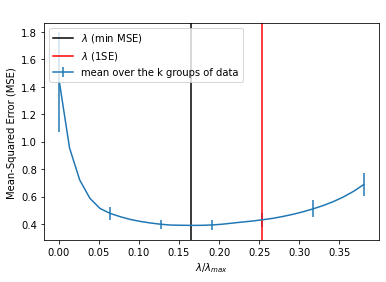

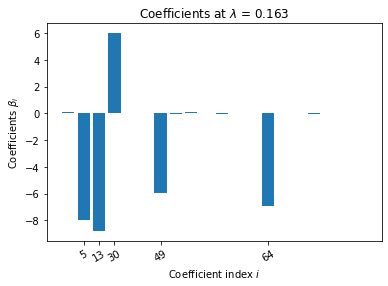

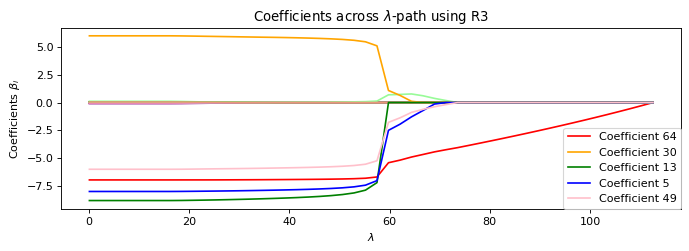

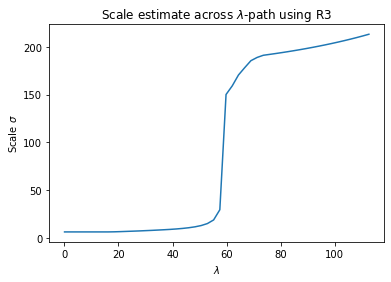

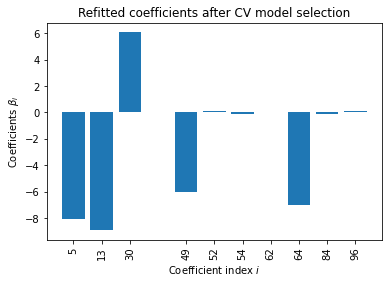

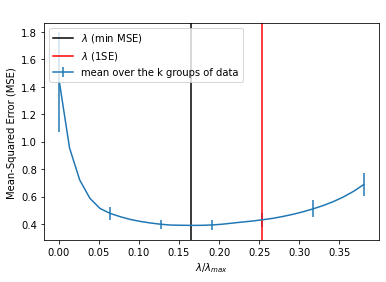

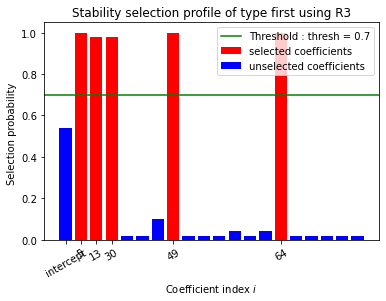

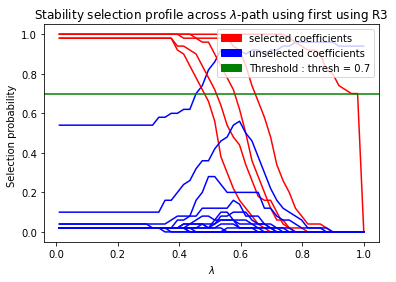

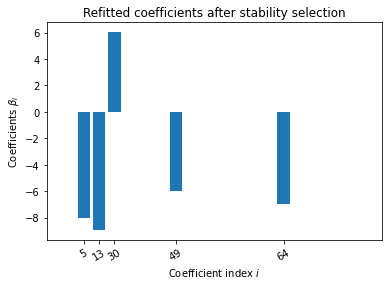


 LAMBDA FIXED : 
   Sigma  =  0.084
   Selected variables :  5    13    30    49    64    
   Running time :  0.018s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.071s

 CROSS VALIDATION : 
 Intercept : 0.05436562421512586
   Selected variables :  5    13    30    48    49    52    54    62    64    84    96    
   Running time :  0.879s

 STABILITY SELECTION : 
   Selected variables :  0    1    2    6    13    
   Running time :  0.868s

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.295
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION 

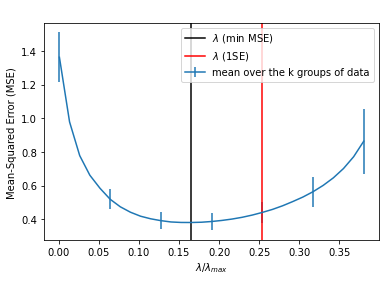

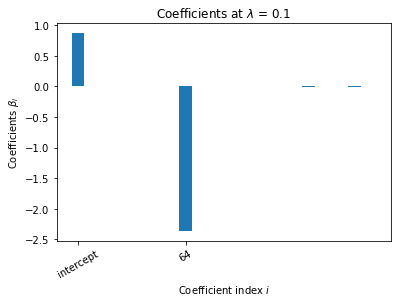

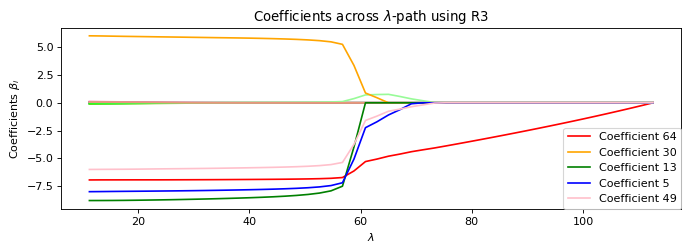

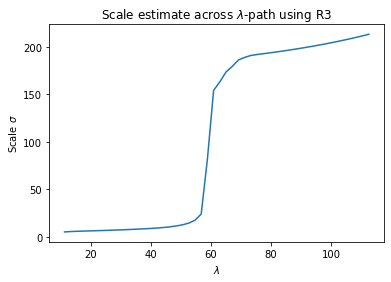

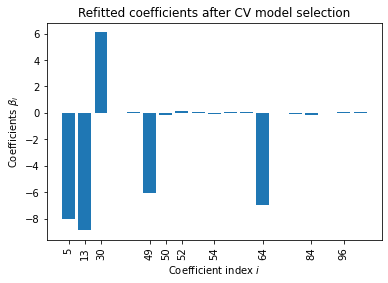

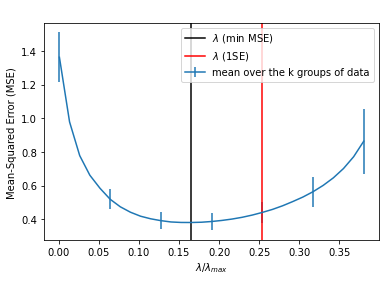

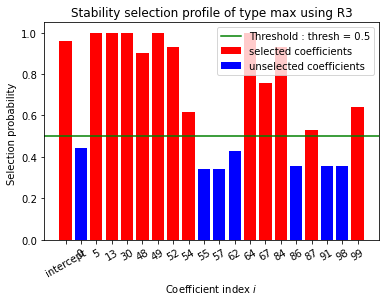

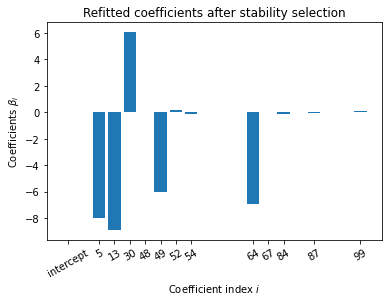


 LAMBDA FIXED : 
   Sigma  =  24.285
   Selected variables :  intercept    64    
   Running time :  2.953s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.038s

 CROSS VALIDATION : 
 Intercept : 0.08677598131660635
   Selected variables :  5    13    30    43    48    49    50    52    53    54    59    62    64    74    75    84    88    96    99    
   Running time :  0.725s

 STABILITY SELECTION : 
   Selected variables :  intercept    1    2    3    4    5    6    7    11    12    13    15    18    
   Running time :  7.968s

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.428
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE

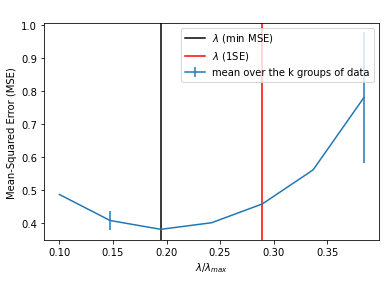

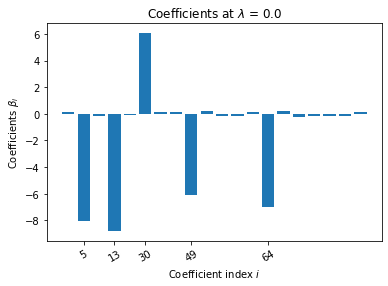

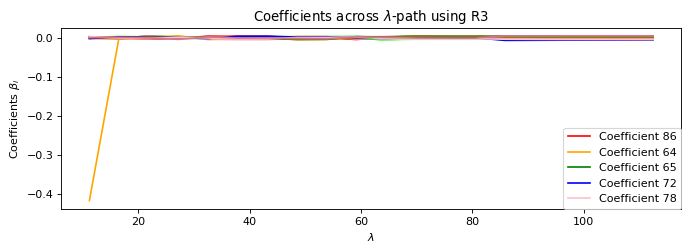

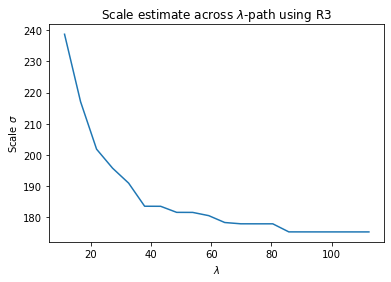

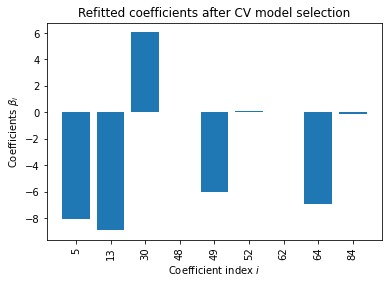

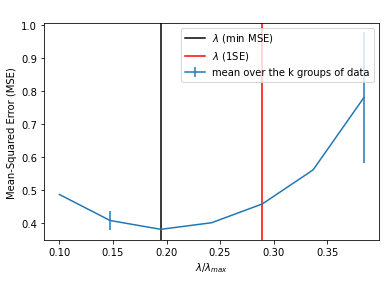

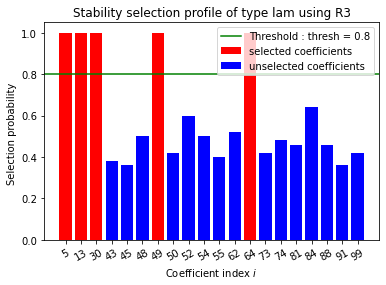

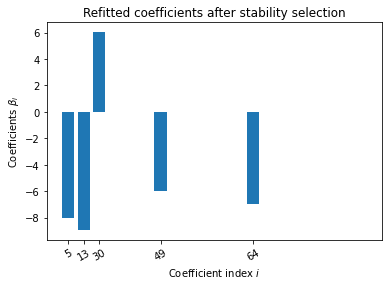


 LAMBDA FIXED : 
   Sigma  =  0.047
   Selected variables :  5    13    30    49    64    
   Running time :  0.001s

 PATH COMPUTATION : 
   Running time :  13.334s

 CROSS VALIDATION : 
   Selected variables :  5    13    30    48    49    52    62    64    84    
   Running time :  0.095s

 STABILITY SELECTION : 
   Selected variables :  0    1    2    6    12    
   Running time :  0.793s



In [24]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [17]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

problem1.formulation.intercept = False
problem2.formulation.intercept = False
problem3.formulation.intercept = False

## R4

In [18]:
problem1.formulation.concomitant = True
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = True
problem3.formulation.classification = False

In [ ]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [20]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'


problem1.formulation.intercept = False
problem2.formulation.intercept = False
problem3.formulation.intercept = False

## C1

In [21]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = True
problem1.data.y = np.sign(problem1.data.y)

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = True
problem2.data.y = np.sign(problem2.data.y)

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = True
problem3.data.y = np.sign(problem3.data.y)

 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.014
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



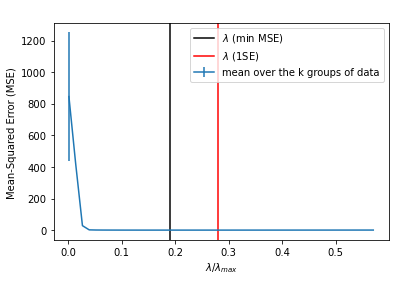

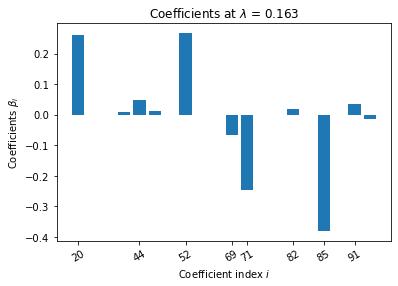

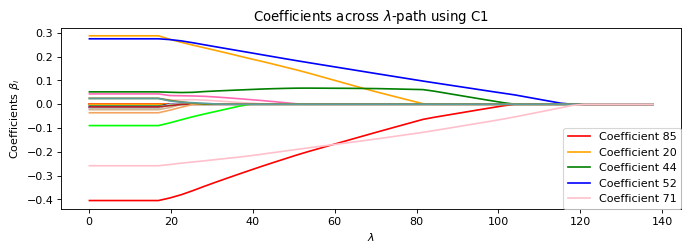

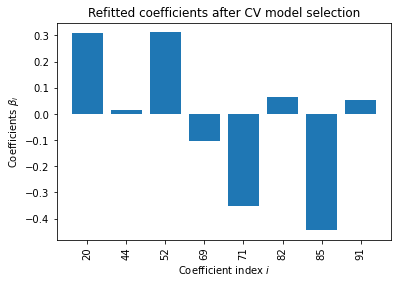

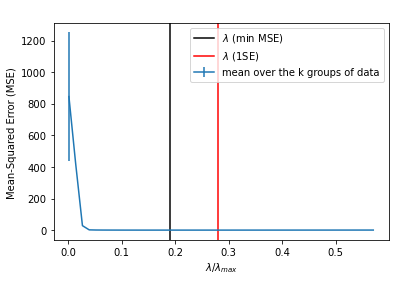

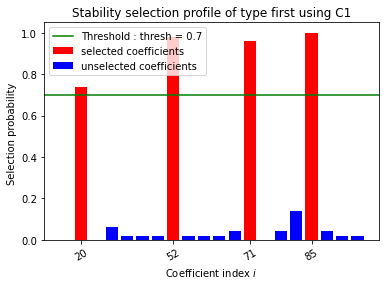

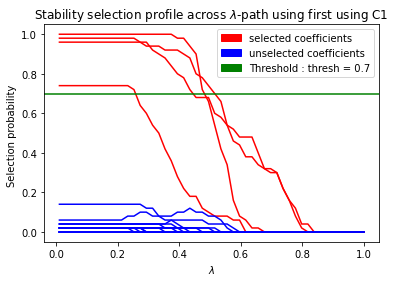

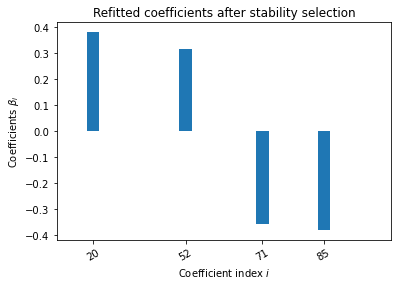


 LAMBDA FIXED : 
   Selected variables :  20    44    52    69    71    82    85    91    
   Running time :  0.053s

 PATH COMPUTATION : 
   Running time :  0.094s

 CROSS VALIDATION : 
   Selected variables :  20    44    52    69    71    82    85    91    
   Running time :  1.292s

 STABILITY SELECTION : 
   Selected variables :  1    7    12    16    
   Running time :  0.979s

 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.022
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : max
     B = 70
   

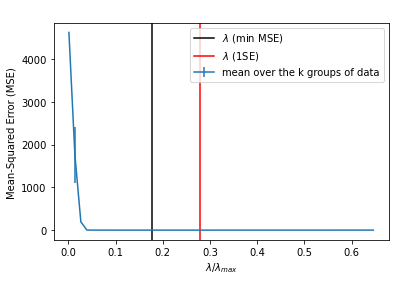

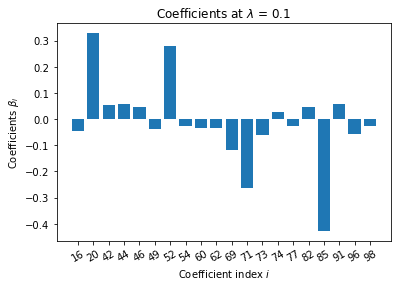

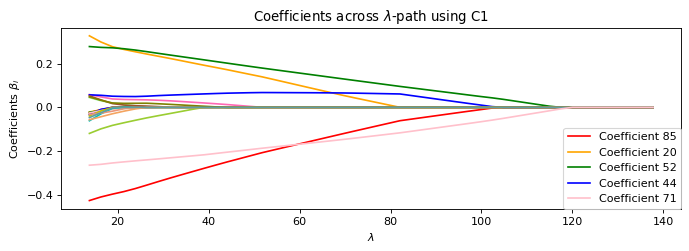

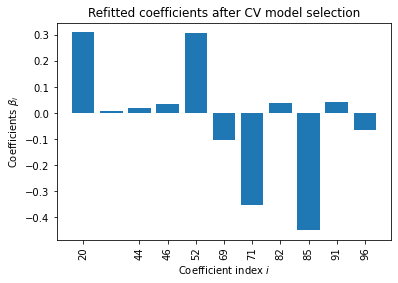

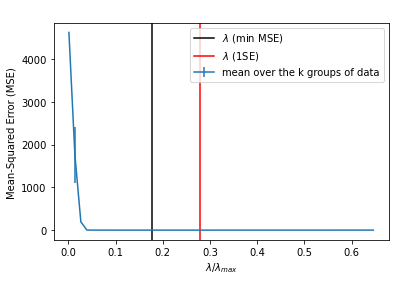

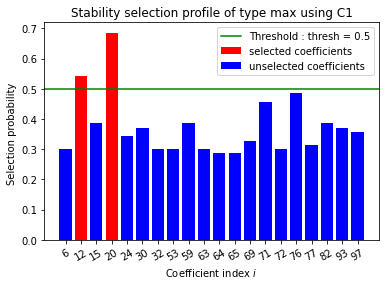

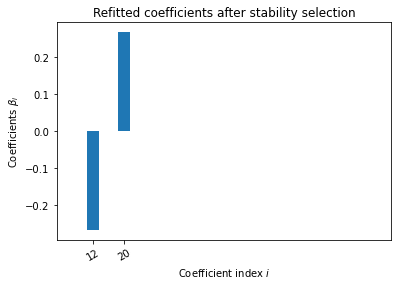


 LAMBDA FIXED : 
   Selected variables :  16    20    42    43    44    46    49    52    54    60    62    69    71    73    74    77    82    85    91    96    98    
   Running time :  0.092s

 PATH COMPUTATION : 
   Running time :  0.076s

 CROSS VALIDATION : 
   Selected variables :  20    42    44    46    52    69    71    82    85    91    96    
   Running time :  1.943s

 STABILITY SELECTION : 
   Selected variables :  1    3    
   Running time :  32.381s



/Users/lsimpson/Desktop/GitHub/c-lasso/classochange/path_alg.py:456: RuntimeWarning: divide by zero encountered in double_scalars
  E + lam / (lam - dlamb) * (s - E),
/Users/lsimpson/Desktop/GitHub/c-lasso/classochange/path_alg.py:456: RuntimeWarning: invalid value encountered in multiply
  E + lam / (lam - dlamb) * (s - E),


 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 6.483
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 3
     lamin = 0.1
     Nlam = 20
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 1000
     percent_nS = 0.4
     threshold = 0.8
     lam = theoretical
     theoretical_lam = 0.2574



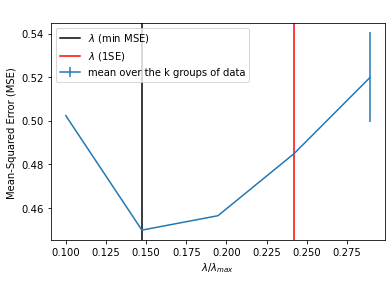

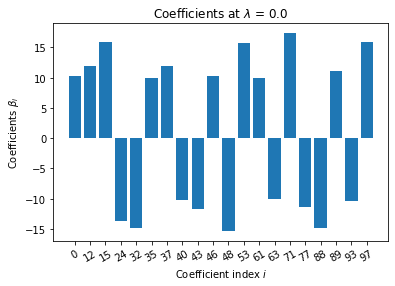

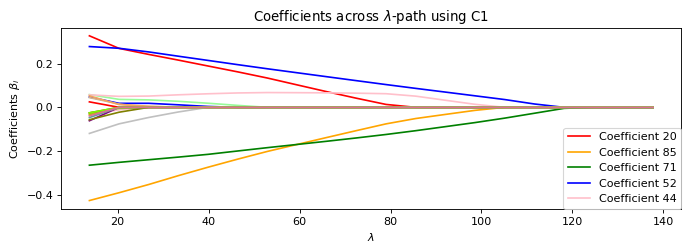

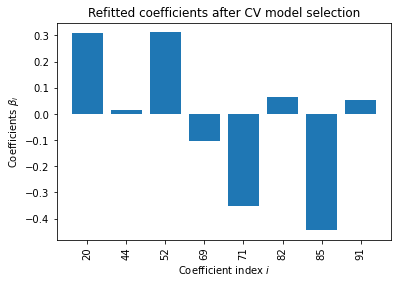

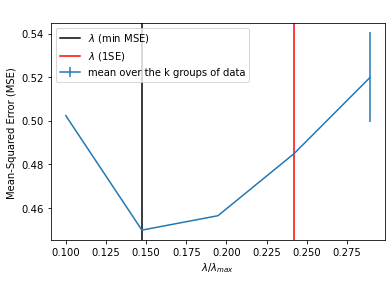

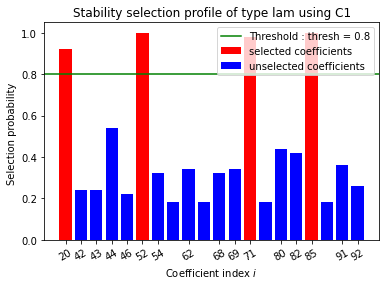

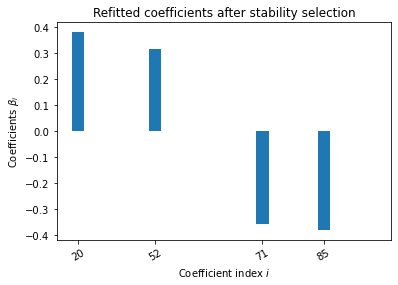


 LAMBDA FIXED : 
   Selected variables :  0    1    3    7    12    14    15    16    20    21    23    24    26    27    30    32    33    35    37    38    40    41    42    43    46    48    53    55    58    59    61    63    64    65    69    71    73    76    77    78    81    84    85    86    87    88    89    92    93    96    97    
   Running time :  0.645s

 PATH COMPUTATION : 
   Running time :  0.08s

 CROSS VALIDATION : 
   Selected variables :  20    44    52    69    71    82    85    91    
   Running time :  0.241s

 STABILITY SELECTION : 
   Selected variables :  0    5    12    16    
   Running time :  1.156s



In [22]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [23]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C2

In [24]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = True

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = True

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = True

 
 
FORMULATION: C2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.014
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



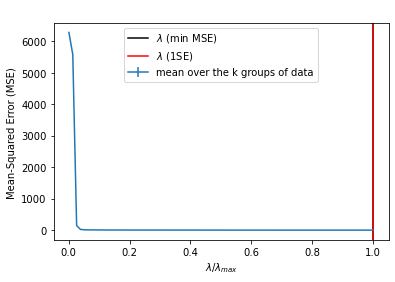

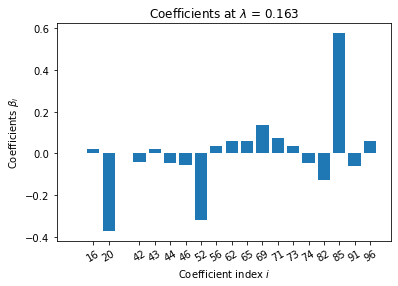

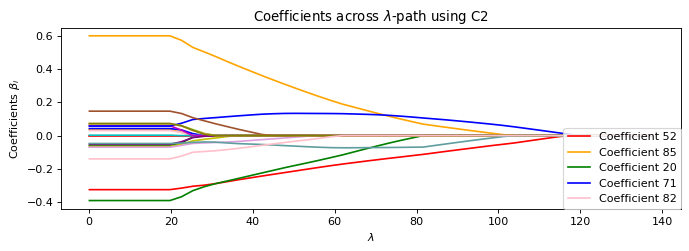

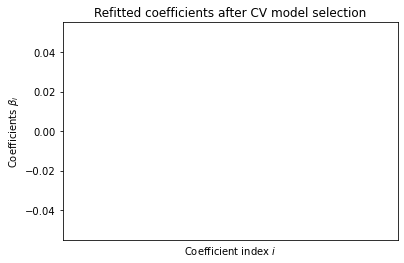

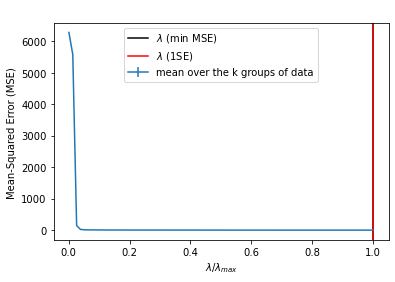

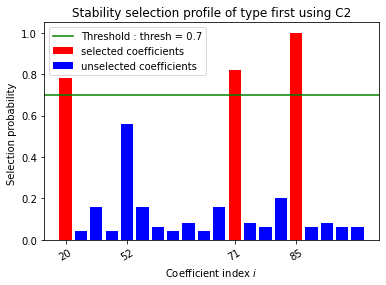

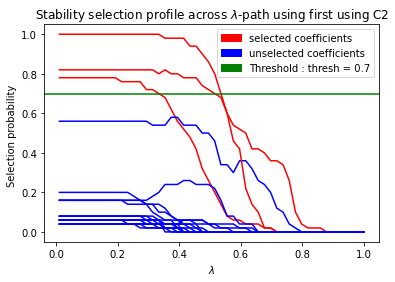

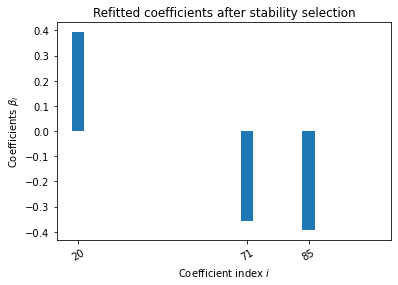


 LAMBDA FIXED : 
   Selected variables :  16    20    42    43    44    46    52    56    62    65    69    71    73    74    82    85    91    96    
   Running time :  0.124s

 PATH COMPUTATION : 
   Running time :  0.254s

 CROSS VALIDATION : 
   Selected variables :  
   Running time :  3.4s

 STABILITY SELECTION : 
   Selected variables :  0    11    15    
   Running time :  2.461s

 
 
FORMULATION: C2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.022
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : max
     B = 7

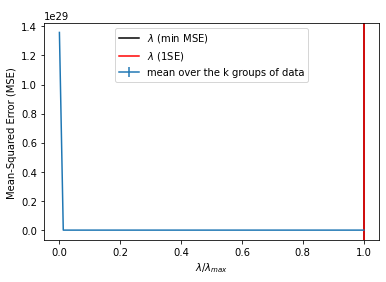

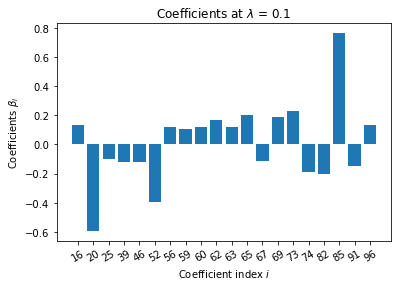

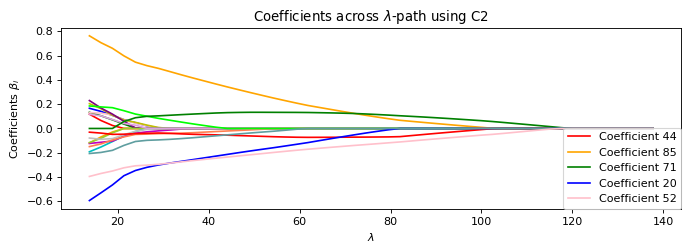

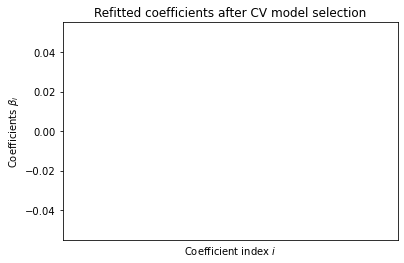

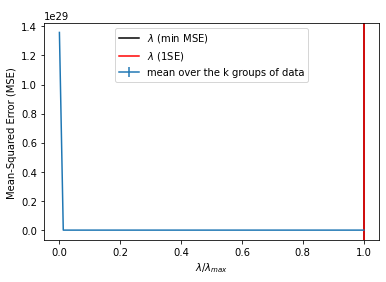

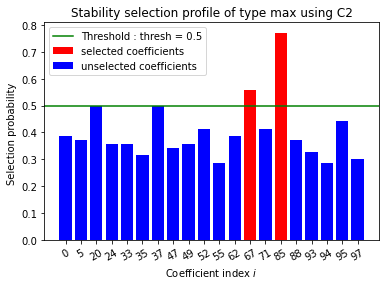

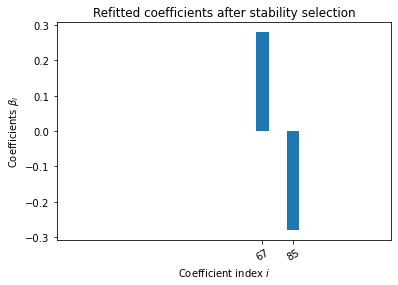


 LAMBDA FIXED : 
   Selected variables :  16    20    24    25    29    39    42    43    44    46    47    49    52    53    56    59    60    62    63    65    66    67    69    73    74    79    82    85    88    89    91    96    
   Running time :  0.222s

 PATH COMPUTATION : 
   Running time :  0.237s

 CROSS VALIDATION : 
   Selected variables :  
   Running time :  4.448s

 STABILITY SELECTION : 
   Selected variables :  12    14    
   Running time :  47.018s



/Users/lsimpson/Desktop/GitHub/c-lasso/classochange/path_alg.py:577: RuntimeWarning: divide by zero encountered in double_scalars
  E + lam / (lam - dlamb) * (s - E),


 
 
FORMULATION: C2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 6.483
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 3
     lamin = 0.1
     Nlam = 20
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 1000
     percent_nS = 0.4
     threshold = 0.8
     lam = theoretical
     theoretical_lam = 0.2574



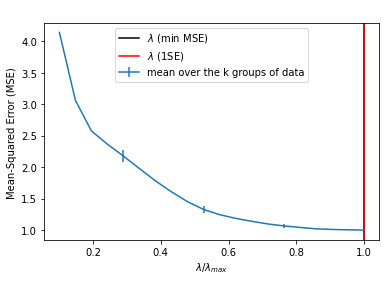

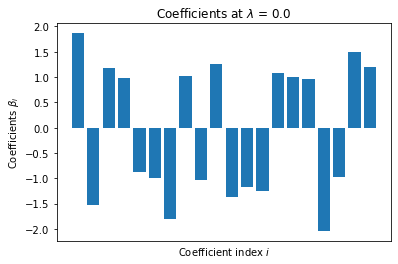

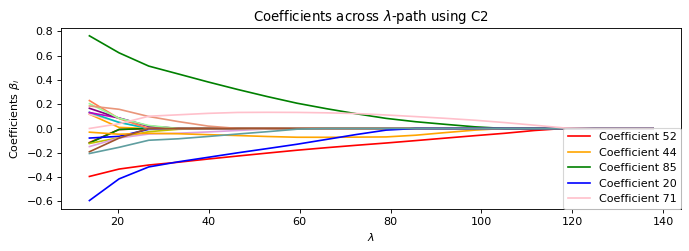

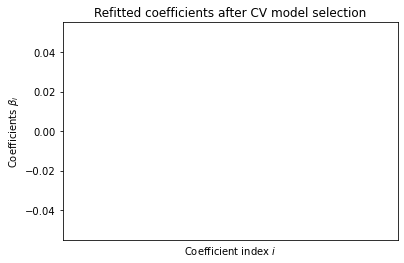

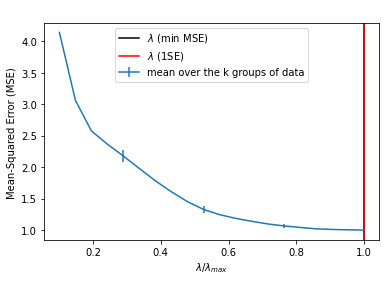

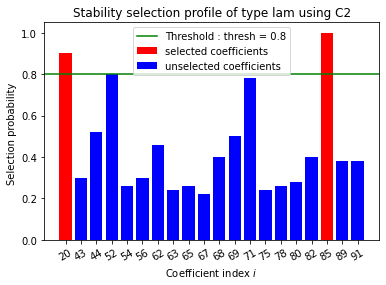

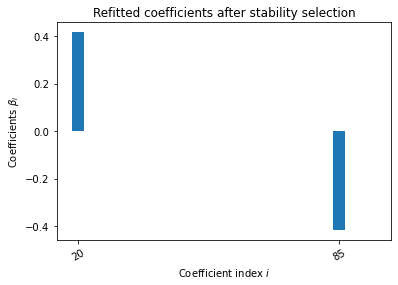


 LAMBDA FIXED : 
   Selected variables :  
   Running time :  0.391s

 PATH COMPUTATION : 
   Running time :  0.179s

 CROSS VALIDATION : 
   Selected variables :  
   Running time :  0.335s

 STABILITY SELECTION : 
   Selected variables :  0    17    
   Running time :  2.333s



In [25]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)